In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
df = pd.read_csv('final_부동산.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 기본 정보 확인
print("✅ 데이터프레임 크기:", df.shape)
print("✅ 컬럼 목록:")
print(df.columns.tolist())

✅ 데이터프레임 크기: (91824, 160)
✅ 컬럼 목록:
['기준년월', '가명 식별자', '외감구분', '설립일자', '종업원수', '주소지시군구', '상장일자', '상장폐지일자', '유동자산', '비유동자산', '당좌자산', '재고자산', '유형자산', '재공품', '현금', '현금등가물', '상품유가증권', '현금성자산', '매출채권', '매출채권(전기)', '매출채권처분손실(당기)', '무형자산', '투자자산', '자산총계', '자산총계(전기)', '유동부채', '단기차입금', '차입금', '매입채무', '비유동부채', '부채총계', '자기자본(납입자본금)', '자본잉여금', '납입자본', '이익잉여금', '자본조정', '기타포괄손익누계액', '유보금', '자본총계', '전기자본총계', '매출액', '전기매출액', '매출원가', '매출총이익', '판매비와관리비', '법인세비용차감전 순이익', '전기법인세차감전순이익', '법인세', '계속사업이익', '중단산업손익', '금융비용', '영업손익', '전기영업이익', '영업외수익', '영업외비용', '법인세차감전순이익', '당기순이익', '당기순이익(전기)', '현금흐름', '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름', '부채상환계수', '영업이익이자보상배율', '이자비용', '사채이자(당기)', '이자보상배율', '적립금비율', 'EBIT', 'EBITDA', '청산가치율', '청산가치', '순운전자본', '순차입금', '총자산증가율', '부채비율', '자기자본비율', '유동비율', '차입금의존도', '매출액증가율', '영업이익율', '당기순이익율', '매출원가율', '판관비율', '자기자본이익률(ROE)', '매출채권회전율', '재고자산회전율', '매입채무회전율', '총자산회전율', '총자산순이익률', '유동자산증가율', '유형자산증가율', '단기차입금의존도', '당좌비율', '순차입금비율', '순운전자본회전율', '총자본회전율', '자기자본순이익율', '매출총이익율', 'EBITD

In [6]:
df_건설 = df[df['업종(대분류)'].str.contains('부동산업', na=False)]

In [7]:
# '기준년월'이 202403 같은 형식이라면 연도와 월로 분리
df_건설['기준년'] = df_건설['기준년월'] // 100
df_건설['기준월'] = df_건설['기준년월'] % 100

In [8]:
# 총자산 = 유동자산 + 비유동자산
df_건설['총자산'] = df_건설['유동자산'] + df_건설['비유동자산']

# 총부채 = 유동부채 + 비유동부채
df_건설['총부채'] = df_건설['유동부채'] + df_건설['비유동부채']

# 부채비율 = 총부채 / 총자산
df_건설['부채비율'] = df_건설['총부채'] / (df_건설['총자산'] + 1e-6)  # 0으로 나누는 것 방지

In [9]:
# 자기자본 = 총자산 - 총부채
df_건설['자기자본'] = df_건설['총자산'] - df_건설['총부채']

# 자기자본비율 = 자기자본 / 총자산
df_건설['자기자본비율'] = df_건설['자기자본'] / (df_건설['총자산'] + 1e-6)

# 총자산회전율 = 매출액 / 총자산
df_건설['총자산회전율'] = df_건설['매출액'] / (df_건설['총자산'] + 1e-6)

# 매출총이익률 = 매출총이익 / 매출액
df_건설['매출총이익률'] = df_건설['매출총이익'] / (df_건설['매출액'] + 1e-6)


In [10]:
# 연체 경험이 있는지 여부 (3년 이내 30일 이상 연체)
df_건설['연체경험여부'] = (
    (df_건설['기준년월 시점 3년내 연체일수가 30일 이상 된 대출연체 유지 기관수(연체대출금 상환 포함)'] > 0)
).astype(int)

# 최근 연체 발생 후 경과일수 (음수는 없음으로 처리)
df_건설['연체발생_경과일수'] = df_건설[
    '기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 발생일자로 부터 경과일수(해제 포함)'
].clip(lower=0)

# 공공정보 유지건수 존재 여부
df_건설['공공정보_유지여부'] = (
    df_건설['기준년월 시점 공공정보 (한국신용정보원) 유지건수(해제 제외)'] > 0
).astype(int)


In [11]:
for col in df_건설.columns:
    if '과목수' in col:
        print(col)


기준년월 시점 대출연체 과목수
기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 3개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)
기준년월 시점 6개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)
기준년월 시점 1년내 대출연체 신규발생 과목수(연체대출금 상환 포함)
기준년월 시점 3년내 대출연체 신규발생 과목수(연체대출금 상환 포함)
기준년월 시점 3개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 6개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 1년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 3년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 제외)
기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 제외)


In [12]:
df_건설['총연체대출과목수'] = (
    df_건설['기준년월 시점 대출연체 과목수'] +
    df_건설['기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)']
)


In [13]:
df_건설['총신규연체과목수'] = (
    df_건설['기준년월 시점 3개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 6개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 1년내 대출연체 신규발생 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 3년내 대출연체 신규발생 과목수(연체대출금 상환 포함)']
)


In [14]:
df_건설['총장기연체과목수'] = (
    df_건설['기준년월 시점 3개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 6개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 1년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 3년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)']
)


In [15]:
df_건설['이자원금_30일초과연체과목수'] = (
    df_건설['기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 포함)'] +
    df_건설['기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 제외)']
)


In [16]:
[col for col in df_건설.columns if '연체' in col]


['기준년월 시점 대출연체 과목수',
 '기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 3개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)',
 '기준년월 시점 6개월내 대출연체 신규발생 과목수(연체대출금 상환 포함)',
 '기준년월 시점 1년내 대출연체 신규발생 과목수(연체대출금 상환 포함)',
 '기준년월 시점 3년내 대출연체 신규발생 과목수(연체대출금 상환 포함)',
 '기준년월 시점 3개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 6개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 1년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 3년내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 제외)',
 '기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 포함)',
 '기준년월 시점 연체일수가 30일 이상 된 이자 및 원금 대출연체 유지 과목수(연체대출금 상환 제외)',
 '기준년월 시점 연체일수가 30일 이상 대출연체 유지 기관수(연체대출금 상환 제외)\n: 기관=법인등록번호 기준 소속 사업자번호수',
 '기준년월 시점 연체일수가 30일 이상 대출연체 유지 기관수(연체대출금 상환 포함)',
 '기준년월 시점 연체일수가 30일 이상 대출연체 유지 기관수(연체대출금 상환 제외)',
 '기준년월 시점 연체일

In [17]:
print(df_건설.columns.tolist())


['기준년월', '가명 식별자', '외감구분', '설립일자', '종업원수', '주소지시군구', '상장일자', '상장폐지일자', '유동자산', '비유동자산', '당좌자산', '재고자산', '유형자산', '재공품', '현금', '현금등가물', '상품유가증권', '현금성자산', '매출채권', '매출채권(전기)', '매출채권처분손실(당기)', '무형자산', '투자자산', '자산총계', '자산총계(전기)', '유동부채', '단기차입금', '차입금', '매입채무', '비유동부채', '부채총계', '자기자본(납입자본금)', '자본잉여금', '납입자본', '이익잉여금', '자본조정', '기타포괄손익누계액', '유보금', '자본총계', '전기자본총계', '매출액', '전기매출액', '매출원가', '매출총이익', '판매비와관리비', '법인세비용차감전 순이익', '전기법인세차감전순이익', '법인세', '계속사업이익', '중단산업손익', '금융비용', '영업손익', '전기영업이익', '영업외수익', '영업외비용', '법인세차감전순이익', '당기순이익', '당기순이익(전기)', '현금흐름', '영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름', '부채상환계수', '영업이익이자보상배율', '이자비용', '사채이자(당기)', '이자보상배율', '적립금비율', 'EBIT', 'EBITDA', '청산가치율', '청산가치', '순운전자본', '순차입금', '총자산증가율', '부채비율', '자기자본비율', '유동비율', '차입금의존도', '매출액증가율', '영업이익율', '당기순이익율', '매출원가율', '판관비율', '자기자본이익률(ROE)', '매출채권회전율', '재고자산회전율', '매입채무회전율', '총자산회전율', '총자산순이익률', '유동자산증가율', '유형자산증가율', '단기차입금의존도', '당좌비율', '순차입금비율', '순운전자본회전율', '총자본회전율', '자기자본순이익율', '매출총이익율', 'EBITDA마진율', '영업이익증가율', '당기순이익증가율', 'EBIT

In [18]:
correlations = df_건설.corr(numeric_only=True)['기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생']\
    .sort_values(key=lambda x: abs(x), ascending=False)

print(correlations.head(15))


기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생    1.000000
10구간으로 구분(1~10. 1등급일수록 우량)                                                                 0.177003
상장일자                                                                                       0.135710
기준년월 시점 3개월내 대출연체 발생분 최장 보유일수(연체대출금 상환 포함)                                                 0.102611
기준년월 시점 1년내 대출연체 발생분 최장 보유일수(연체대출금 상환 포함)                                                  0.096061
기준년월 시점 6개월내 대출연체 발생분 최장 보유일수(연체대출금 상환 포함)                                                 0.093420
기준년월 시점 1년내 연체일수가 30일 이상 된 대출연체 유지 기관수(연체대출금 상환 포함)                                        0.090076
기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 발생일자로 부터 경과일수(해제 포함)                                  -0.087859
연체발생_경과일수                                                                                 -0.087859
기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수                                         -0.087858


In [19]:
# 1. 컬럼명 짧게 바꾸기
df_건설 = df_건설.rename(columns={
    '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생': '부도여부',
    '10구간으로 구분(1~10. 1등급일수록 우량)': '신용등급',
    '기준년월 시점 3개월내 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)': '3개월_30일연체_과목수',
    '기준년월 시점 6개월내 대출연체 발생분 최장 보유일수(연체대출금 상환 포함)': '6개월연체_최장보유일수',
    '연체경험여부': '연체경험',
    '총신규연체과목수': '신규연체과목수',
    '기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수': '공공정보_해제경과일수'
})


In [20]:
# 주요 피처와 타겟만 추출
selected_features = [
    '신용등급',
    '3개월_30일연체_과목수',
    '6개월연체_최장보유일수',
    '연체경험',
    '신규연체과목수',
    '공공정보_해제경과일수'
]

X = df_건설[selected_features].copy()
y = df_건설['부도여부'].copy()


In [21]:
from sklearn.impute import SimpleImputer

# 수치형은 평균, 범주형(예: 연체경험)은 최빈값으로
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# 연체경험이 이진값이면 float일 수도 있음
for col in X.columns:
    if X[col].dtype == 'float64' or X[col].dtype == 'int64':
        X[col] = num_imputer.fit_transform(X[[col]])
    else:
        X[col] = cat_imputer.fit_transform(X[[col]])


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산용 DataFrame
X_vif = pd.DataFrame(X, columns=selected_features)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)


,Feature,VIF
0,신용등급,5.234812
5,공공정보_해제경과일수,4.920141
2,6개월연체_최장보유일수,1.560218
3,연체경험,1.326993
4,신규연체과목수,1.321185
1,3개월_30일연체_과목수,1.251921


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 학습/검증 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 1. RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

# 평가
print("🔹 RandomForest 결과")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))

# 2. XGBoostClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# 평가
print("\n🔹 XGBoost 결과")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_prob))


🔹 RandomForest 결과
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17825
           1       0.67      0.11      0.19       540

    accuracy                           0.97     18365
   macro avg       0.82      0.56      0.59     18365
weighted avg       0.96      0.97      0.96     18365

ROC AUC: 0.7869535608539816

🔹 XGBoost 결과
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17825
           1       0.70      0.06      0.10       540

    accuracy                           0.97     18365
   macro avg       0.83      0.53      0.54     18365
weighted avg       0.96      0.97      0.96     18365

ROC AUC: 0.8002080930860735


---
# 언더샘플링
---

In [24]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Resampled:", Counter(y_resampled))

# 학습/검증 나누기
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# 랜덤포레스트 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("🔹 언더샘플링 + RF 결과")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))


Resampled: Counter({0: 2700, 1: 2700})
🔹 언더샘플링 + RF 결과
              precision    recall  f1-score   support

           0       0.83      0.51      0.64       540
           1       0.65      0.90      0.75       540

    accuracy                           0.71      1080
   macro avg       0.74      0.71      0.70      1080
weighted avg       0.74      0.71      0.70      1080

ROC AUC: 0.7952417695473251


In [25]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

print("🔹 언더샘플링 + XGB 결과")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_prob))


🔹 언더샘플링 + XGB 결과
              precision    recall  f1-score   support

           0       0.83      0.51      0.63       540
           1       0.65      0.89      0.75       540

    accuracy                           0.70      1080
   macro avg       0.74      0.70      0.69      1080
weighted avg       0.74      0.70      0.69      1080

ROC AUC: 0.7887174211248285


---
# 오버샘플링
---

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


In [27]:
# 컬럼명 전체 보기
for col in df_건설.columns:
    print(col)


기준년월
가명 식별자
외감구분
설립일자
종업원수
주소지시군구
상장일자
상장폐지일자
유동자산
비유동자산
당좌자산
재고자산
유형자산
재공품
현금
현금등가물
상품유가증권
현금성자산
매출채권
매출채권(전기)
매출채권처분손실(당기)
무형자산
투자자산
자산총계
자산총계(전기)
유동부채
단기차입금
차입금
매입채무
비유동부채
부채총계
자기자본(납입자본금)
자본잉여금
납입자본
이익잉여금
자본조정
기타포괄손익누계액
유보금
자본총계
전기자본총계
매출액
전기매출액
매출원가
매출총이익
판매비와관리비
법인세비용차감전 순이익
전기법인세차감전순이익
법인세
계속사업이익
중단산업손익
금융비용
영업손익
전기영업이익
영업외수익
영업외비용
법인세차감전순이익
당기순이익
당기순이익(전기)
현금흐름
영업활동현금흐름
투자활동현금흐름
재무활동현금흐름
부채상환계수
영업이익이자보상배율
이자비용
사채이자(당기)
이자보상배율
적립금비율
EBIT
EBITDA
청산가치율
청산가치
순운전자본
순차입금
총자산증가율
부채비율
자기자본비율
유동비율
차입금의존도
매출액증가율
영업이익율
당기순이익율
매출원가율
판관비율
자기자본이익률(ROE)
매출채권회전율
재고자산회전율
매입채무회전율
총자산회전율
총자산순이익률
유동자산증가율
유형자산증가율
단기차입금의존도
당좌비율
순차입금비율
순운전자본회전율
총자본회전율
자기자본순이익율
매출총이익율
EBITDA마진율
영업이익증가율
당기순이익증가율
EBITDA증가율
OCF/매출액비용
부채상환계수.1
차입금/EBITDA
EBITDA/금융비용
EBITDA/금융비용.1
EBITDA/금융비용.2
EBITDA/금융비용.3
EBITDA/금융비용.4
EBITDA/금융비용.5
기준년월 시점 대출연체 과목수
기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)
기준년월 시점 3개월내 대출연체 신규발생 

In [28]:
# 정확한 피처 리스트 다시 확인 (컬럼명 정확히 매칭 필요)
selected_features = [
    '신용등급',
    '3개월_30일연체_과목수',
    '6개월연체_최장보유일수',
    '연체경험',
    '신규연체과목수',
    '공공정보_해제경과일수'
]

target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'


X = df_건설[selected_features]
y = df_건설['부도여부']


In [29]:
# 학습/테스트 분리 (stratify로 불균형 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = XGBClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_oversampled, y_train_oversampled)

# 평가
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[10185  7640]
 [   87   453]]
              precision    recall  f1-score   support

           0     0.9915    0.5714    0.7250     17825
           1     0.0560    0.8389    0.1049       540

    accuracy                         0.5793     18365
   macro avg     0.5238    0.7051    0.4150     18365
weighted avg     0.9640    0.5793    0.7068     18365



In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

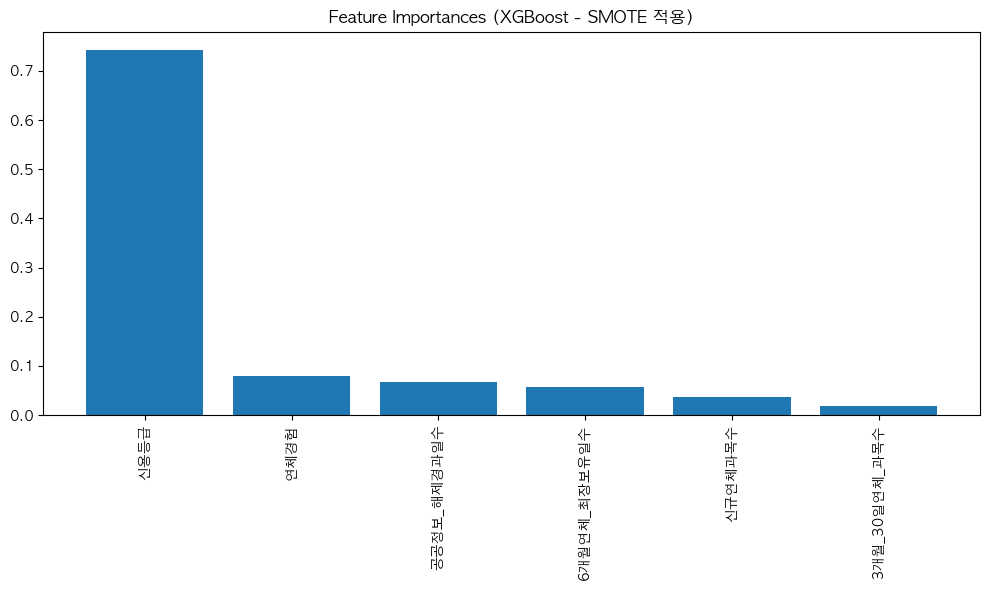

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 중요도 추출
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [selected_features[i] for i in indices]

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost - SMOTE 적용)")
plt.bar(range(len(selected_features)), importances[indices])
plt.xticks(range(len(selected_features)), features_sorted, rotation=90)
plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# 예측 확률 얻기
y_proba = model.predict_proba(X_test)[:, 1]  # 부도 클래스(1)의 확률

# threshold 조정 (예: 0.2로 설정)
threshold = 0.2
y_pred_thresh = (y_proba >= threshold).astype(int)

# 평가
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=4))


[[ 7153 10672]
 [   39   501]]
              precision    recall  f1-score   support

           0     0.9946    0.4013    0.5719     17825
           1     0.0448    0.9278    0.0855       540

    accuracy                         0.4168     18365
   macro avg     0.5197    0.6645    0.3287     18365
weighted avg     0.9667    0.4168    0.5576     18365



In [35]:
# XGBoost 예시
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))

# RandomForest 예시
rf = RandomForestClassifier(class_weight={0:1, 1:10})  # 부도 쪽에 더 큰 가중치 부여


In [36]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)


In [37]:
from xgboost import XGBClassifier

scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # 불균형 비율
model = XGBClassifier(scale_pos_weight=scale, random_state=42)


In [38]:
from imblearn.combine import SMOTEENN
sampler = SMOTEENN(random_state=42)
X_res, y_res = sampler.fit_resample(X_train, y_train)


In [39]:
from sklearn.svm import SVC

model = SVC(class_weight={0: 1, 1: 10}, probability=True)


In [40]:
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. 클래스 비율 계산
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"scale_pos_weight = {scale:.2f}")

# 2. 모델 생성
model_xgb_weighted = XGBClassifier(
    scale_pos_weight=scale,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 3. 학습
model_xgb_weighted.fit(X_train, y_train)

# 4. 예측
y_pred = model_xgb_weighted.predict(X_test)
y_proba = model_xgb_weighted.predict_proba(X_test)[:, 1]

# 5. 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


scale_pos_weight = 33.01
[[10212  7613]
 [   79   461]]
              precision    recall  f1-score   support

           0       0.99      0.57      0.73     17825
           1       0.06      0.85      0.11       540

    accuracy                           0.58     18365
   macro avg       0.52      0.71      0.42     18365
weighted avg       0.96      0.58      0.71     18365

ROC AUC: 0.7912


In [42]:
df_건설.to_csv('피처추가함.csv', index=False)